In [1]:
import numpy as np
import pandas as pd
import pandas as pd
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity
import json
import glob

In [2]:
folder_path = '/Users/samkurlender/Downloads/spotify_data_finalproject/'
file_pattern_path = folder_path + 'mpd.slice.*.json'

files = glob.glob(file_pattern_path)
dfs = []

for file_path in files:
    with open(file_path) as f:
        data = json.load(f)
        playlists = data["playlists"] 

        if playlists:
            df = pd.DataFrame(playlists)
            dfs.append(df) 

if dfs:
    playlists_df = pd.concat(dfs, ignore_index=True)
    print(f"Number of rows in final DataFrame: {len(playlists_df)} \n")
    print(playlists_df.head())
else:
    print("No data frames to concatenate.")


Number of rows in final DataFrame: 5000 

            name collaborative    pid  modified_at  num_tracks  num_albums  \
0           Funk         false  10000   1470355200          16          15   
1      Childhood         false  10001   1412985600          28          19   
2    Old Country         false  10002   1421971200          23          19   
3  april showers         false  10003   1492646400          14          14   
4            DnB         false  10004   1496534400          31          21   

   num_followers                                             tracks  \
0              1  [{'pos': 0, 'artist_name': 'Coldplay', 'track_...   
1              1  [{'pos': 0, 'artist_name': 'The Killers', 'tra...   
2              1  [{'pos': 0, 'artist_name': 'Old Crow Medicine ...   
3              1  [{'pos': 0, 'artist_name': 'The B-52's', 'trac...   
4              1  [{'pos': 0, 'artist_name': 'Netsky', 'track_ur...   

   num_edits  duration_ms  num_artists  \
0          4      40

In [3]:
import itertools as itertools

artists = {}
for playlist in dfs: 
    for tracks in playlist['tracks']: 
        for track in tracks: 
            artist = track['artist_name']
            if artist not in artists: 
                artists[artist] = 0
            artists[artist] += 1
            
sorted_artists = dict(sorted(artists.items(), key=lambda item: item[1], reverse=True))
dict(itertools.islice(sorted_artists.items(), 20))

{'Drake': 4428,
 'Kanye West': 1985,
 'Kendrick Lamar': 1698,
 'Rihanna': 1668,
 'Eminem': 1664,
 'The Weeknd': 1613,
 'Beyoncé': 1318,
 'Ed Sheeran': 1286,
 'Future': 1255,
 'Justin Bieber': 1164,
 'The Chainsmokers': 1114,
 'J. Cole': 1102,
 'Lil Uzi Vert': 1084,
 'Maroon 5': 1026,
 'Luke Bryan': 1007,
 'Florida Georgia Line': 998,
 'Calvin Harris': 993,
 'Chris Brown': 983,
 'John Mayer': 958,
 'Twenty One Pilots': 946}

In [4]:
songs = {}
for playlist in dfs: 
    for tracks in playlist['tracks']: 
        for track in tracks: 
            song = track['track_name'] + ' - ' + track['artist_name']
            if song not in songs: 
                songs[song] = 0
            songs[song] += 1
            
sorted_songs = dict(sorted(songs.items(), key=lambda item: item[1], reverse=True))
dict(itertools.islice(sorted_songs.items(), 20))

{'One Dance - Drake': 224,
 'HUMBLE. - Kendrick Lamar': 215,
 'Closer - The Chainsmokers': 213,
 'Broccoli (feat. Lil Yachty) - DRAM': 209,
 'Congratulations - Post Malone': 196,
 'Caroline - Aminé': 189,
 'XO TOUR Llif3 - Lil Uzi Vert': 179,
 'Bad and Boujee (feat. Lil Uzi Vert) - Migos': 177,
 'iSpy (feat. Lil Yachty) - KYLE': 171,
 'Jumpman - Drake': 169,
 'Roses - The Chainsmokers': 169,
 'goosebumps - Travis Scott': 166,
 'Starboy - The Weeknd': 166,
 'Location - Khalid': 164,
 'No Problem (feat. Lil Wayne & 2 Chainz) - Chance The Rapper': 163,
 'Bounce Back - Big Sean': 162,
 'Fake Love - Drake': 161,
 'Panda - Desiigner': 157,
 'Trap Queen - Fetty Wap': 156,
 "Don't Let Me Down - The Chainsmokers": 156}

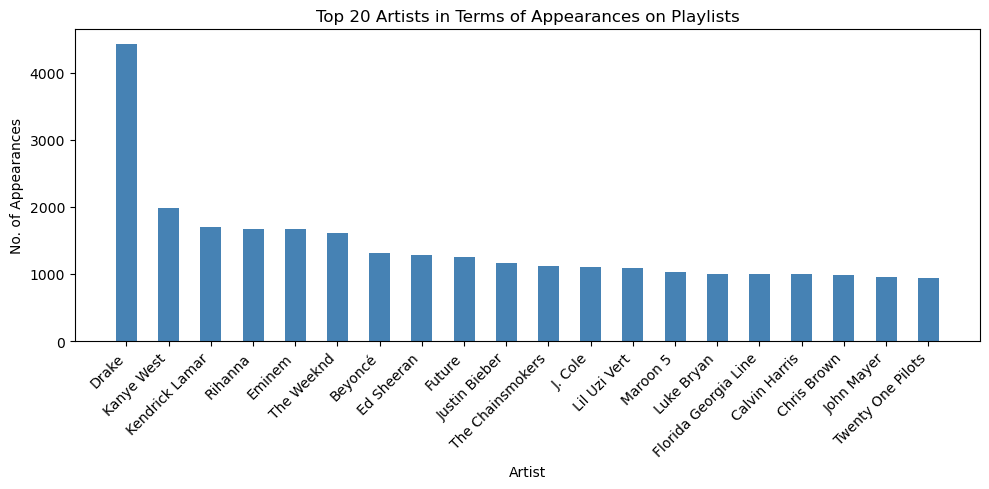

In [5]:
import matplotlib.pyplot as plt 


artists = list(sorted_artists.keys())
appearances = list(sorted_artists.values())

artists = artists[:20]
appearances = appearances[:20]

fig = plt.figure(figsize = (10, 5))

plt.bar(artists, appearances, color ='steelblue', 
        width = .5)

plt.xlabel("Artist")
plt.ylabel("No. of Appearances")
plt.title("Top 20 Artists in Terms of Appearances on Playlists")

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()



/var/folders/fc/pdzs20394zjgfkqhywq86g940000gn/T/ipykernel_13861/2885665391.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


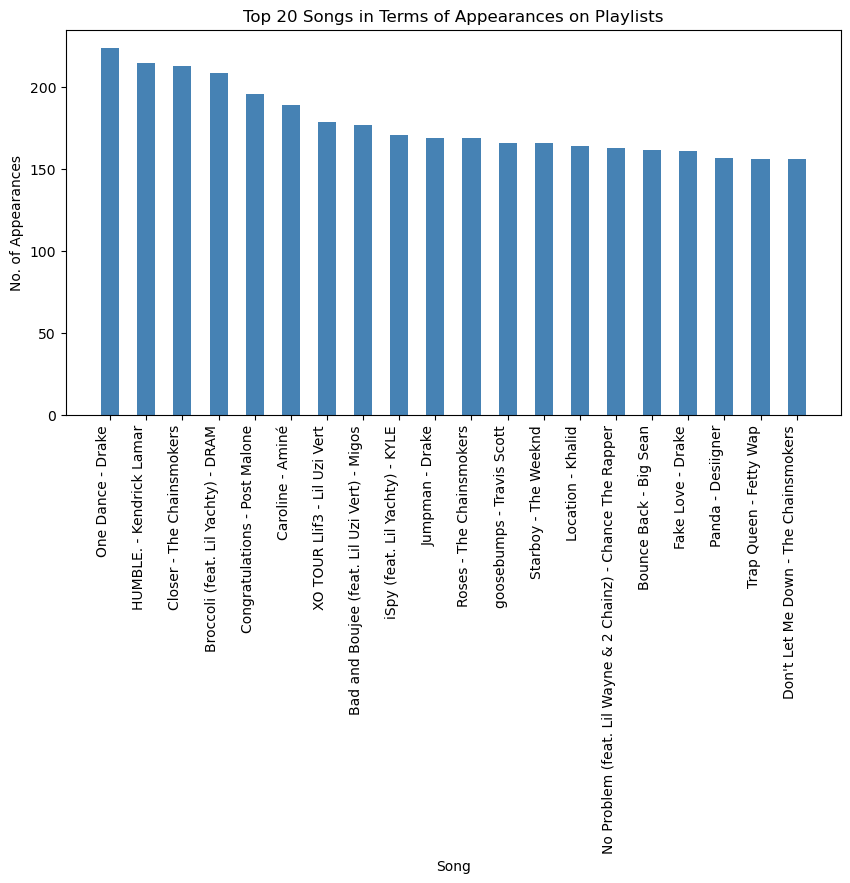

In [6]:
songs = list(sorted_songs.keys())
appearances = list(sorted_songs.values())

songs = songs[:20]
appearances = appearances[:20]

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(songs, appearances, color ='steelblue', 
        width = .5)

plt.xlabel("Song")
plt.ylabel("No. of Appearances")
plt.title("Top 20 Songs in Terms of Appearances on Playlists")

plt.xticks(rotation=90, ha='right')

plt.tight_layout()

plt.show()

In [7]:
tracks_dict = {}

for index, row in playlists_df.iterrows():
    playlist_id = row['pid']
    tracks = row['tracks']
    
    if tracks:  # Ensure that there are tracks
        for track in tracks:
            track_id = f"{track['artist_name']} - {track['track_name']}"  # Unique identifier for the track
            if track_id not in tracks_dict:
                tracks_dict[track_id] = []
            tracks_dict[track_id].append(playlist_id)

unique_tracks = list(tracks_dict.keys())
playlist_ids = sorted(playlists_df['pid'].unique())

matrix = pd.DataFrame(0, index=unique_tracks, columns=playlist_ids)

# Fill the Matrix
for track, playlists in tracks_dict.items():
    for playlist_id in playlists:
        matrix.loc[track, playlist_id] = 1
        

In [8]:
display(matrix)

,0,1,2,3,4,5,6,7,8,9,...,100990,100991,100992,100993,100994,100995,100996,100997,100998,100999
Coldplay - Magic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Coldplay - A Sky Full of Stars,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Sting - Every Little Thing She Does Is Magic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Prince - I Wanna Be Your Lover - Single Version,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Prince - Raspberry Beret,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cascade - Evacuate The Dancefloor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Big Data - Dangerous - Spacebrother's Electro Stomp Remix,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Madonna - Living For Love,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Newton Faulkner - Gone In The Morning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
np.sum(matrix[8])

46

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(matrix)
matrix_norm = scaler.transform(matrix)

In [11]:
from sklearn.decomposition import TruncatedSVD

k = 100

svd = TruncatedSVD(n_components=k)
X_transformed = svd.fit_transform(matrix_norm)

In [12]:
# TrucatedSVD returns the "transformer object", so we have to take out our own U, S, and Vt
import time

tic1 = time.time()

U = X_transformed / svd.singular_values_
S = svd.singular_values_
Vt = svd.components_

S_k = np.diag(S)  # Shape: (100, 100)

# We perform dimensionality reduction and obtain Uk, Skl, and Vk
U_k = U[:, :k]
S_k = np.diag(S[:k])
Vt_k = Vt[:k, :]


# Computing (UkSk)^1/2 - an m x k matrix that is the k dimensional representation of m customers
S_k_sq = np.sqrt(S_k)

r_mat1 = U_k@S_k_sq

toc1 = time.time()

# r_mat2 = S_k_sq @ Vt_k

In [13]:
print("Shape of U_k: ", U_k.shape)
print("Shape of S_k: ", S_k.shape)
print("Shape of Vt_k: ", Vt_k.shape)
print("Shape of S_k_sq: ", S_k_sq.shape)

print("Shape of r_mat1: ", r_mat1.shape)


Shape of U_k:  (107107, 100)
Shape of S_k:  (100, 100)
Shape of Vt_k:  (100, 5000)
Shape of S_k_sq:  (100, 100)
Shape of r_mat1:  (107107, 100)


In [14]:
similarity = cosine_similarity(
    r_mat1,
    Vt_k.T
)

similarity = similarity[:,:k]
# Artificially making it m x k - try to fix

In [15]:
print(similarity)

[[ 0.11145828 -0.06380676  0.24299999 ...  0.05367189 -0.12079871
  -0.00710225]
 [-0.02381306 -0.066944    0.20565995 ... -0.05665633 -0.05620715
   0.05323636]
 [ 0.01457467 -0.07674315  0.3213452  ... -0.08660819 -0.18514989
   0.04337627]
 ...
 [-0.05100416  0.01598947  0.07768787 ... -0.03579874  0.10001812
   0.0561069 ]
 [-0.09071119  0.03494338  0.15189427 ... -0.00806005 -0.08184552
   0.03575454]
 [-0.09071119  0.03494338  0.15189427 ... -0.00806005 -0.08184552
   0.03575454]]


In [16]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10, algorithm='auto')
nn.fit(r_mat1)
distances, indices = nn.kneighbors(r_mat1)

In [17]:
# from sklearn.metrics.pairwise import cosine_similarity

# chunk_size = 10000  # Define the size of each chunk
# num_chunks = r_mat1.shape[0] // chunk_size + 1
# user_similarity = np.zeros((r_mat1.shape[0], r_mat1.shape[0]))

# for i in range(num_chunks):
#     start_i = i * chunk_size
#     end_i = min((i + 1) * chunk_size, r_mat1.shape[0])
#     user_chunk = r_mat1[start_i:end_i]

#     for j in range(i, num_chunks):
#         start_j = j * chunk_size
#         end_j = min((j + 1) * chunk_size, r_mat1.shape[0])
#         other_chunk = r_mat1[start_j:end_j]

#         user_similarity[start_i:end_i, start_j:end_j] = cosine_similarity(user_chunk, other_chunk)

In [40]:
def get_top_n_recommendations(user_index, r_mat1, indices, top_n=10):
    neighbors = indices[user_index]
    print("NEIGHBORS:", neighbors)
    neighbor_items = r_mat1[neighbors]
    print("NEIGHBORS:", neighbor_items.shape)

    item_scores = np.sum(neighbor_items, axis=0)
    
    top_items = np.argsort(item_scores)[::-1][:top_n]
    
    return top_items

In [41]:
user_index = 84
top_items_trunc = get_top_n_recommendations(user_index, r_mat1, indices, top_n=10)

print("Top 10 recommendations for user", user_index,":")
print(top_items_trunc, "\n\n")

print("Top 10 recommendations for user", user_index,"- with track titles:")
for i in top_items_trunc:
    print(unique_tracks[i])

NEIGHBORS: [80 93 89 92 88 85 84 86 87 90]
NEIGHBORS: (10, 100)
Top 10 recommendations for user 84 :
[74 93 80 57 81 87 90 69 76 99] 


Top 10 recommendations for user 84 - with track titles:
Maggie Rogers - Alaska
Major Lazer - Get Free - Andy C remix
Netsky - Eyes Closed
George Strait - Check Yes Or No
Netsky - Rio
Netsky - Let's Leave Tomorrow
Netsky - Lost Without You
Zara Larsson - Sexual - Recorded at Spotify Studios NYC
The xx - I Dare You
Andy C - Heartbeat Loud


In [42]:
their_playlist_mat = matrix[user_index]
their_playlist_list = []
       
for track_name, value in their_playlist_mat.items():
    if value == 1:
        their_playlist_list.append(track_name)

print(their_playlist_list)

['Childish Gambino - Redbone', 'G-Eazy - Some Kind Of Drug', "Eminem - 'Till I Collapse", 'J. Cole - G.O.M.D.', 'Kanye West - POWER', 'The Game - The Game & Skrillex: El Chapo', 'Survivor - Eye of the Tiger', "DMX - X Gon' Give It To Ya", 'Eminem - Lose Yourself - Soundtrack Version', 'Tech N9ne - Riot Maker', 'Eminem - Cinderella Man', 'J. Cole - No Role Modelz', 'Nelly - Heart Of A Champion - Album Version / Explicit', "Guns N' Roses - Welcome To The Jungle", 'DMX - Where The Hood At', "2Pac - Runnin' (Dying To Live)", 'The Weeknd - Party Monster', 'Tech N9ne - Worldwide Choppers', "Roy Jones Jr. - Can't Be Touched (feat. Mr. Magic & Trouble)", "Eminem - You Don't Know", 'J. Cole - Immortal', 'Eminem - Phenomenal', 'Fabolous - My Time', 'Bad Meets Evil - Above The Law', 'D12 - Fight Music', 'Tech N9ne - The Beast', "NF - Grindin'", 'Saba - GPS', "50 Cent - If I Can't", 'Tech N9ne - Am I A Psycho', 'Rob Bailey & The Hustle Standard - Beast - Southpaw Remix', '2Pac - Ballad Of A Dead S

# Now, let's try using the 'svds' method

In [43]:
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix

k = 100

tic2 = time.time()

# svds returns the "transformer object", so we have to take out our own U, S, and Vt
matrix2 = matrix.astype(float)
matrix2 = csr_matrix(matrix2)
U_svds, S_svds, Vt_svds = svds(matrix2,k = k)

S_k_svds = np.diag(S_svds)  # Shape: (100, 100)

# We perform dimensionality reduction and obtain Uk, Skl, and Vk
U_k_svds = U_svds[:, :k]
S_k_svds = np.diag(S_svds[:k])
Vt_k_svds = Vt_svds[:k, :]


# Computing (UkSk)^1/2 - an m x k matrix that is the k dimensional representation of m customers
S_k_sq_svds = np.sqrt(S_k_svds)

r_mat1_svds = U_k_svds @ S_k_sq_svds

toc2 = time.time()

print("Shape of U_k: ", U_k_svds.shape)
print("Shape of S_k: ", S_k_svds.shape)
print("Shape of Vt_k: ", Vt_k_svds.shape)
print("Shape of S_k_sq: ", S_k_sq_svds.shape)

print("Shape of r_mat1: ", r_mat1_svds.shape)

Shape of U_k:  (107107, 100)
Shape of S_k:  (100, 100)
Shape of Vt_k:  (100, 5000)
Shape of S_k_sq:  (100, 100)
Shape of r_mat1:  (107107, 100)


In [44]:
nn_svds = NearestNeighbors(n_neighbors=10, algorithm='auto')
nn_svds.fit(r_mat1_svds)
distances_svds, indices_svds = nn.kneighbors(r_mat1_svds)

In [45]:
user_index = 84
top_items_svds = get_top_n_recommendations(user_index, r_mat1_svds, indices_svds, top_n=10)

print("Top 10 recommendations for user", user_index,":")
print(top_items_svds, "\n\n")

print("Top 10 recommendations for user", user_index,"- with track titles:")
for i in top_items_svds:
    print(unique_tracks[i])

NEIGHBORS: [94651 94656 94653 94655 94650 94652 94647 94648 94649 94654]
NEIGHBORS: (10, 100)
Top 10 recommendations for user 84 :
[ 3 12 26 10 71 22 51 33 72 57] 


Top 10 recommendations for user 84 - with track titles:
Prince - I Wanna Be Your Lover - Single Version
Caroline Pennell - The Way I Am - The Voice Performance
Spongebob Squarepants - F.U.N. Song
James Morrison - You Give Me Something
Derek Pope - Floor Is Lava
Young Money - BedRock
Hank Williams, Jr. - A Country Boy Can Survive
Secondhand Serenade - Broken
Alabama Shakes - This Feeling
George Strait - Check Yes Or No


## Now, let's try 'randomized_svd'

In [46]:
from sklearn.utils.extmath import randomized_svd

k = 100

tic3 = time.time()

# randomized_svd returns the "transformer object", so we have to take out our own U, S, and Vt
U_rand, S_rand, Vt_rand = randomized_svd(matrix,n_components = k)

S_k_rand = np.diag(S_rand)  # Shape: (100, 100)

# We perform dimensionality reduction and obtain Uk, Skl, and Vk
U_k_rand = U_rand[:, :k]
S_k_rand = np.diag(S_rand[:k])
Vt_k_rand = Vt_rand[:k, :]


# Computing (UkSk)^1/2 - an m x k matrix that is the k dimensional representation of m customers
S_k_sq_rand = np.sqrt(S_k_rand)

r_mat1_rand = U_k_rand @ S_k_sq_rand

toc3 = time.time()

print("Shape of U_k: ", U_k_rand.shape)
print("Shape of S_k: ", S_k_rand.shape)
print("Shape of Vt_k: ", Vt_k_rand.shape)
print("Shape of S_k_sq: ", S_k_sq_rand.shape)

print("Shape of r_mat1: ", r_mat1_rand.shape)

Shape of U_k:  (107107, 100)
Shape of S_k:  (100, 100)
Shape of Vt_k:  (100, 5000)
Shape of S_k_sq:  (100, 100)
Shape of r_mat1:  (107107, 100)


In [47]:
nn_rand = NearestNeighbors(n_neighbors=10, algorithm='auto')
nn_rand.fit(r_mat1_rand)
distances_rand, indices_rand = nn.kneighbors(r_mat1_rand)

In [48]:
user_index = 84
top_items_rand = get_top_n_recommendations(user_index, r_mat1_rand, indices_rand, top_n=10)

print("Top 10 recommendations for user", user_index,":")
print(top_items_rand, "\n\n")

print("Top 10 recommendations for user", user_index,"- with track titles:")
for i in top_items_rand:
    print(unique_tracks[i])

NEIGHBORS: [6858 6864 6860 6863 6857 6859 6861 6855 6856 6862]
NEIGHBORS: (10, 100)
Top 10 recommendations for user 84 :
[86 80 99 88 71 72 78 65 75 73] 


Top 10 recommendations for user 84 - with track titles:
Netsky - I Can't Hold It
Netsky - Eyes Closed
Andy C - Heartbeat Loud
Netsky - Rise and Shine
Derek Pope - Floor Is Lava
Alabama Shakes - This Feeling
Michael Kiwanuka - Cold Little Heart - Radio Edit
Hank Williams, Jr. - Family Tradition
Childish Gambino - Redbone
Lorde - Liability


### What are the benefits and drawbacks to using each method?

First, let's compare the time it took to run each SVD method:

In [49]:
print('Time taken for truncatedSVD: ', toc1-tic1, "\n\n")

print('Time taken for svds: ', toc2-tic2, "\n\n")

print('Time taken for randomized_SVD: ', toc3-tic3, "\n\n")


Time taken for truncatedSVD:  0.1075587272644043 


Time taken for svds:  12.952003955841064 


Time taken for randomized_SVD:  88.41688823699951 




Text(0.5, 1.0, 'Comparison of the time taken for each SVD Method')

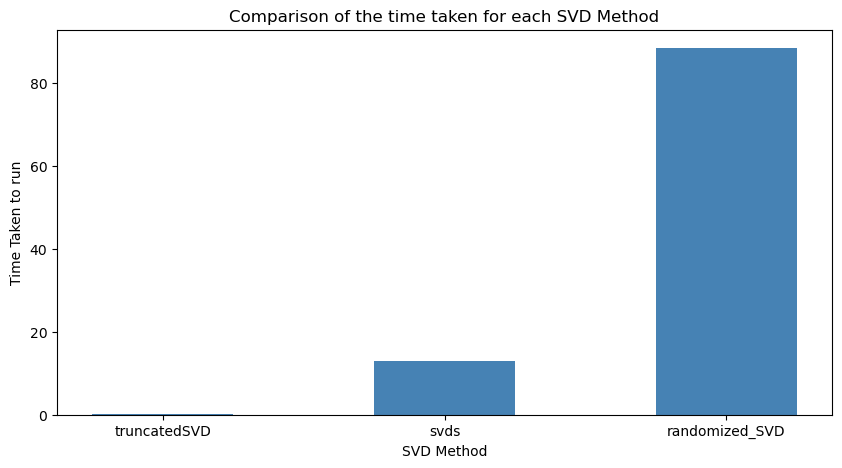

In [50]:
svd_comparison_data = {'truncatedSVD':toc1-tic1, 'svds': toc2-tic2, 'randomized_SVD':toc3-tic3}
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(svd_comparison_data.keys(), svd_comparison_data.values(), color ='steelblue', 
        width = .5)

plt.xlabel("SVD Method")
plt.ylabel("Time Taken to run")
plt.title("Comparison of the time taken for each SVD Method")

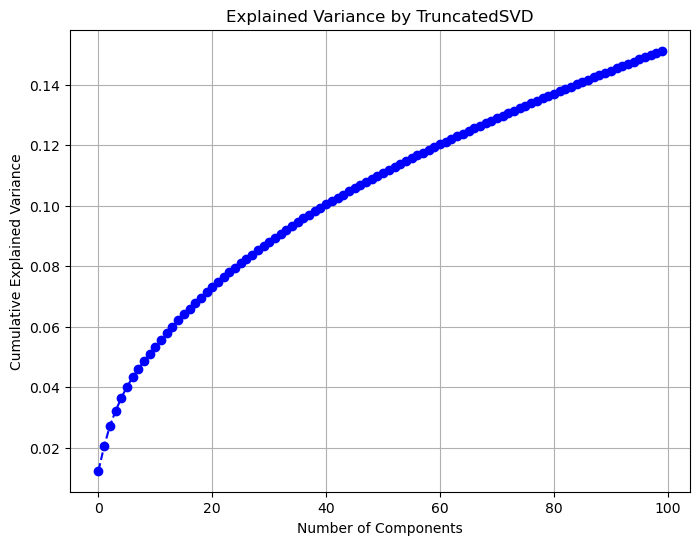

In [51]:
explained_variance = np.cumsum(svd.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by TruncatedSVD')
plt.grid(True)
plt.show()

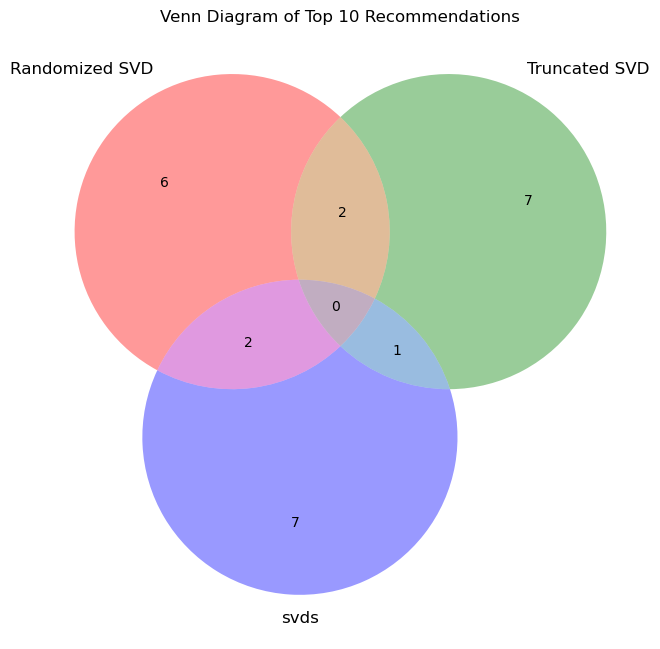

In [52]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Convert the recommendation lists to sets
set_rand = set(top_items_rand)
set_trunc = set(top_items_trunc)
set_svds = set(top_items_svds)

# Create the Venn diagram
plt.figure(figsize=(8, 8))
venn = venn3([set_rand, set_trunc, set_svds], ('Randomized SVD', 'Truncated SVD', 'svds'))

# Title and display the plot
plt.title("Venn Diagram of Top 10 Recommendations")
plt.show()


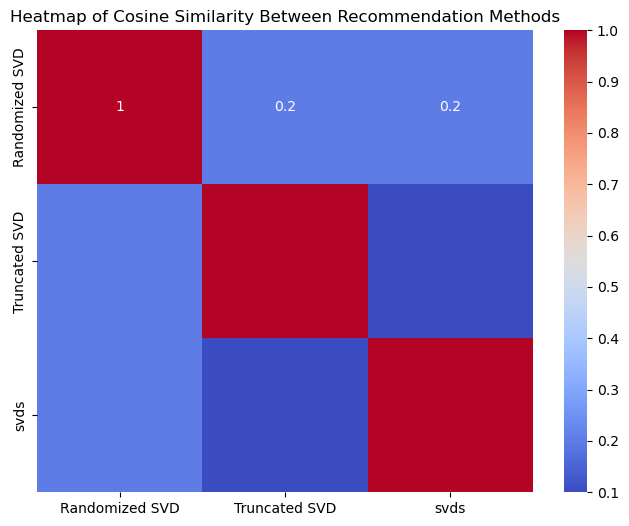

In [53]:
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Convert recommendation lists to binary vectors indicating presence/absence of a track
all_tracks = list(set(top_items_rand).union(set(top_items_trunc), set(top_items_svds)))

def create_binary_vector(top_items, all_tracks):
    return [1 if track in top_items else 0 for track in all_tracks]

vec_rand = create_binary_vector(top_items_rand, all_tracks)
vec_trunc = create_binary_vector(top_items_trunc, all_tracks)
vec_svd = create_binary_vector(top_items_svds, all_tracks)

# Combine vectors
recommendation_matrix = np.array([vec_rand, vec_trunc, vec_svd])

# Calculate cosine similarity
similarity_matrix = cosine_similarity(recommendation_matrix)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, xticklabels=['Randomized SVD', 'Truncated SVD', 'svds'],
            yticklabels=['Randomized SVD', 'Truncated SVD', 'svds'], cmap='coolwarm')
plt.title("Heatmap of Cosine Similarity Between Recommendation Methods")
plt.show()
